In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
from tqdm import tqdm
import random
from google.colab.patches import cv2_imshow

# Helper functions

In [22]:
def correct_segmentations(seg):
  corrected_seg = []
  for i in seg[1:-1].split(","):
    corrected_seg.append(float(i))
  return corrected_seg

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

gt_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images"
def plot_img_points_bbox_segcontour(gt_path, labels_df, idx):
  # idx = random.randint(0, labels_df.shape[0])
  img_path = os.path.join(gt_path, labels_df.folder[idx], labels_df.name[idx])
  title = labels_df.name[idx]
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = "gray")
  colors = ["red", "yellow", "green", "blue", "orange", "pink", "violet", "midnightblue", "tan", "palegreen"]


  image_name = labels_df.name[idx]
  view = labels_df.name == image_name


  points = labels_df.loc[view, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values
  bbox = labels_df.loc[view, ["bbox_x", "bbox_y", "bbox_width", "bbox_height"]].values.copy()
  segmentation = labels_df.loc[view, "segmentation"].values.copy()
  for j in range(points.shape[0]):
    plt.scatter([points[j,0], points[j,2], points[j,4]], [points[j,1], points[j,3], points[j,5]], color=colors[j], s = 20)
    # plt.scatter(np.array([points[0], points[2], points[4]]), np.array([points[1], points[3], points[5]]), color= "red", s = 2)


    bbox_x = np.array([bbox[j][0], bbox[j][0] + bbox[j][2], bbox[j][0] + bbox[j][2], bbox[j][0], bbox[j][0]])
    bbox_y = np.array([img.shape[0] - bbox[j][1], img.shape[0] - bbox[j][1],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]])
    # bbox_x = np.array([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]])
    # bbox_y = np.array([img.shape[0] - bbox[1], img.shape[0] - bbox[1],
    #                  img.shape[0] - bbox[1]-bbox[3],
    #                  img.shape[0] - bbox[1]-bbox[3],
    #                  img.shape[0] - bbox[1]])
    plt.plot(bbox_x, bbox_y, color = colors[j], linewidth = 0.2)


    x_segmentation = correct_segmentations(segmentation[j])[::2]
    y_segmentation = correct_segmentations(segmentation[j])[1::2]
    plt.plot(x_segmentation, y_segmentation, color = colors[j], linewidth = 0.5)


  plt.title(title)
  plt.axis("off");

  # print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [25]:
def get_index_from_im_name(name, df):
  temp = df[df.name == name]
  return temp.index[0]

# Script

In [26]:
data_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images"
folder = "Train"
ims_path = os.path.join(data_path, folder)

ims_list = os.listdir(ims_path)

im_name = random.choice(ims_list)
image_path = os.path.join(ims_path, im_name)
image_path

'/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Train/L1Ap5_8-1-197.png'

In [27]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [28]:
image.shape

(517, 658)

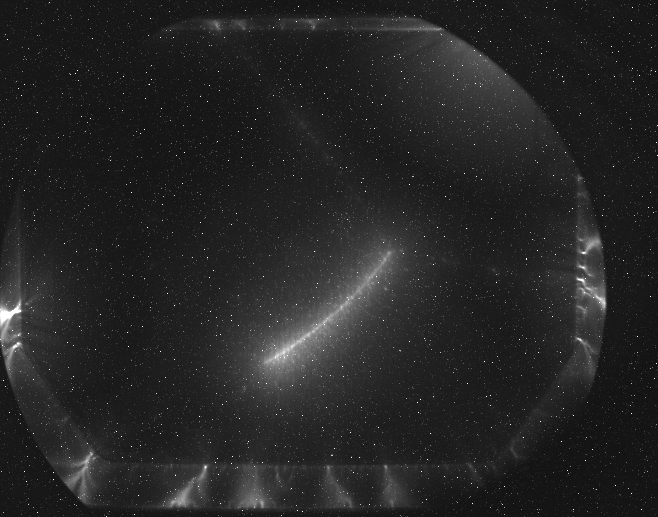

In [29]:
cv2_imshow(image)

In [30]:
csv_path = "/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/annotations.csv"
df = pd.read_csv(csv_path).drop(columns = ["Unnamed: 0"])
df.head()

,id,name,track,z_order,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,folder,bbox_x,bbox_y,bbox_width,bbox_height,segmentation
0,0,L1Ap5_1-1-109.png,Track1,0,411.65,248.47,312.63,149.45,223.32,36.45,Train,209.48,254.64,217.19,239.21,"[217.19, 27.01, 215.91, 28.29, 214.62, 29.58, ..."
1,0,L1Ap5_1-1-109.png,Track2,0,384.92,256.98,339.97,263.66,406.79,249.08,Train,327.71,237.92,93.82,43.73,"[399.68, 239.21, 398.4, 240.5, 397.11, 240.5, ..."
2,1,L1Ap5_1-1-142.png,Track1,0,567.18,283.10,495.49,275.20,440.15,264.27,Val,427.96,218.63,151.65,48.87,"[435.67, 253.36, 434.38, 254.64, 433.1, 254.64..."
3,1,L1Ap5_1-1-142.png,Track2,0,316.88,223.56,243.37,181.04,130.37,128.18,Val,116.95,279.08,214.62,124.75,"[127.23, 117.03, 125.95, 118.32, 124.66, 118.3..."
4,1,L1Ap5_1-1-142.png,Track3,0,364.27,251.51,356.98,269.74,347.26,291.61,Val,332.86,210.92,46.27,66.88,"[355.99, 243.07, 354.7, 244.35, 354.7, 245.64,..."


In [31]:
r_img_count = 0
l_img_count = 0
for i in df.name:
  if i[0] == "R":
    r_img_count += 1
  elif i[0] == "L":
    l_img_count += 1
  else:
    print(f"{i}")
r_img_count, l_img_count

(855, 2142)

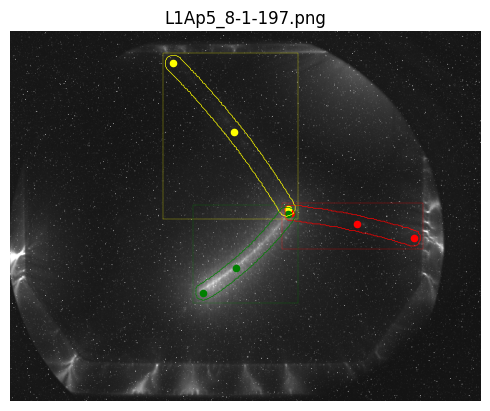

In [32]:
image_ground_truth = plot_img_points_bbox_segcontour(gt_path, df, get_index_from_im_name(im_name, df))

## Cropping

### Left Crop

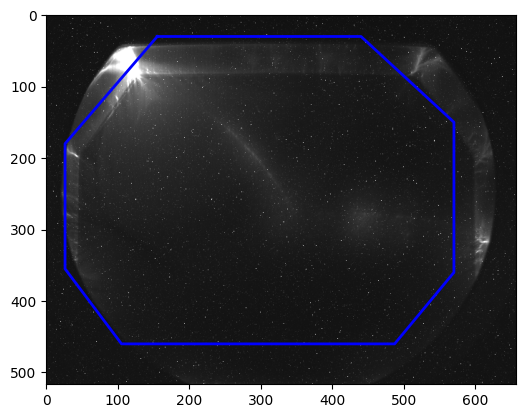

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img, cmap = "gray")
plt.plot([155, 26, 26, 105, 487, 570, 570, 440, 155] , [30, 180, 355, 460, 460, 360, 150, 30, 30], linewidth=2, color="blue")

In [ ]:
from matplotlib.path import Path

left_polygon_vertices = [(155, 30), (26, 180), (26, 355), (105, 460), (487, 460), (570, 360), (570, 150), (440, 30), (155, 30)]
ny, nx = img.shape[:2]

x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path = Path(left_polygon_vertices)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))
grid_left = grid.astype("int")

grid_left

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

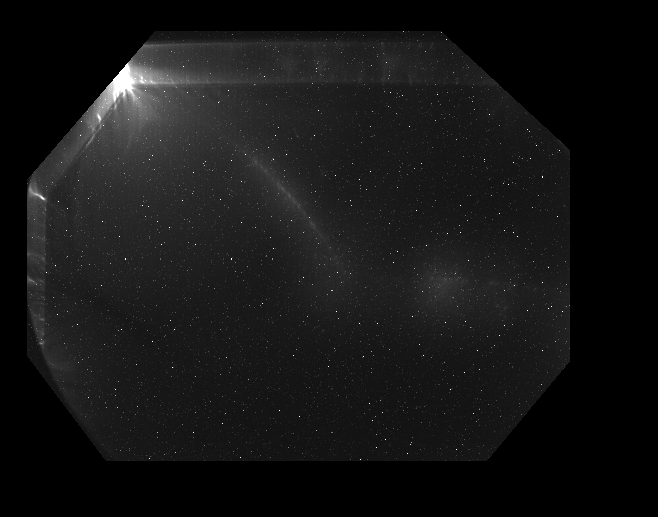

In [ ]:
cv2_imshow(image * grid_left)

### Right Crop

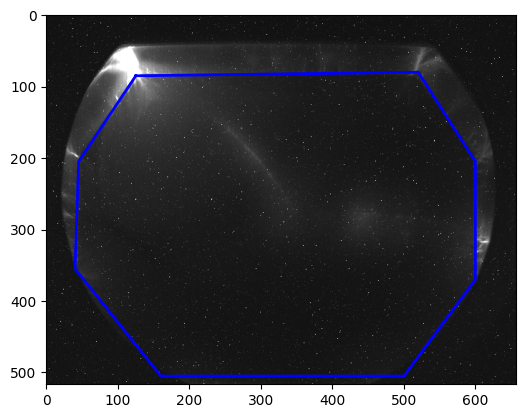

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img, cmap = "gray")
plt.plot([125, 45, 40, 160, 500, 600, 600, 520, 125] , [85, 205, 355, 505, 505, 370, 205, 80, 85], linewidth=2, color="blue")

In [ ]:
right_polygon_vertices = [(125, 85), (45, 205), (40, 355), (160, 505), (500, 505), (600, 370), (600, 205), (520, 80), (125, 85)]
ny, nx = img.shape[:2]

x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path = Path(right_polygon_vertices)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))
grid_right = grid.astype("int")

grid_right

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

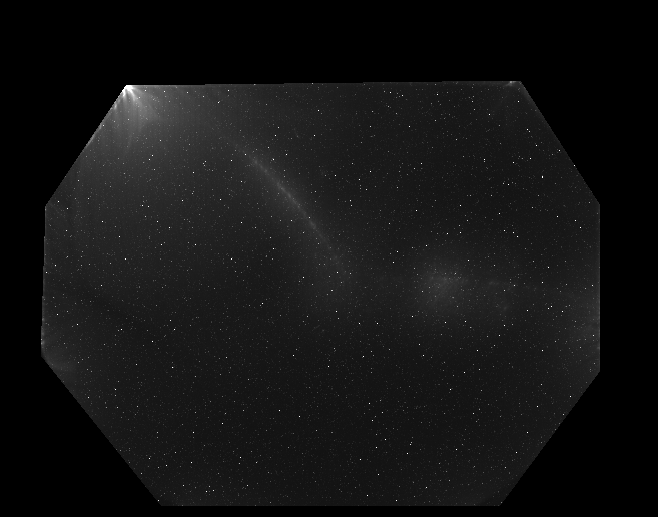

In [ ]:
cv2_imshow(image * grid_right)

### Cropping the images in my directroy

In [ ]:
def crop_images(main_path, destination_path, left_grid, right_grid, gray_scale = False):

  # check if destination directory exists and if not create it
  if os.path.isdir(destination_path):
    print("directory already exists, in case there are images the function will overwrite them")
  else:
    os.mkdir(destination_path)
    print(f"{destination_path} was created")

  # iterate through the main_path images and crop them
  for img_name in tqdm(os.listdir(main_path)):

    # check if the file is an image with .png extension
    if not img_name.endswith('.png'):
      print(f"{img_name} found in {main_path} which is in wrong format, and it will be skipped")
      continue

    # path for the image and read the image
    image_path = os.path.join(main_path, img_name)
    if gray_scale:
      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      left_crop = left_grid
      right_crop = right_grid
    else:
      image = cv2.imread(image_path)
      left_crop = np.dstack((left_grid, left_grid, left_grid))
      right_crop = np.dstack((right_grid, right_grid, right_grid))

    if img_name[0] == "R":
      cropped_image = image * right_crop
    else:
      cropped_image = image * left_crop

    filename = os.path.join(destination_path, img_name)
    cv2.imwrite(filename, cropped_image)

In [ ]:
main_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Test"
destination_path = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Test"
left_grid = grid_left
right_grid = grid_right
crop_images(main_path = main_path, destination_path = destination_path, left_grid = left_grid, right_grid = right_grid, gray_scale = False)

directory already exists, in case there are images the function will overwrite them


100%|██████████| 100/100 [00:07<00:00, 14.09it/s]


In [ ]:
main_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Train"
destination_path = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Train"
left_grid = grid_left
right_grid = grid_right
crop_images(main_path = main_path, destination_path = destination_path, left_grid = left_grid, right_grid = right_grid, gray_scale = False)

directory already exists, in case there are images the function will overwrite them


100%|██████████| 800/800 [01:35<00:00,  8.40it/s]


In [ ]:
main_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images/Val"
destination_path = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Val"
left_grid = grid_left
right_grid = grid_right
crop_images(main_path = main_path, destination_path = destination_path, left_grid = left_grid, right_grid = right_grid, gray_scale = False)

directory already exists, in case there are images the function will overwrite them


100%|██████████| 100/100 [00:09<00:00, 10.87it/s]


## Noise removal

In [ ]:
data_path = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped"
folder = "Train"
ims_path = os.path.join(data_path, folder)

ims_list = os.listdir(ims_path)

im_name = random.choice(ims_list)
image_path = os.path.join(ims_path, im_name)
image_path

'/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Train/L4Jn0_1-2-297.png'

In [ ]:
image = cv2.imread(image_path)
image.shape

(517, 658, 3)

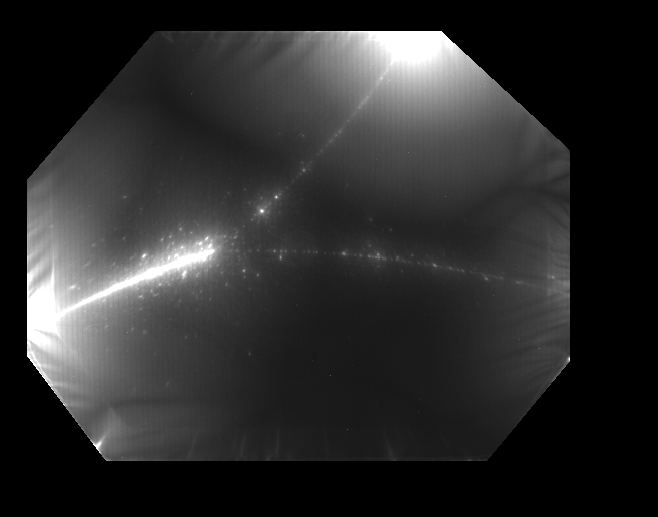

In [ ]:
cv2_imshow(image)

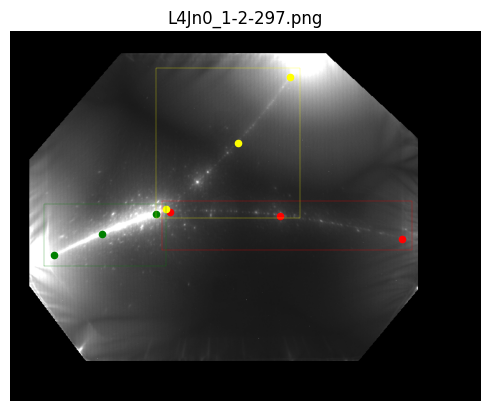

In [ ]:
gt_path = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped"
image_ground_truth = plot_img_points_bbox_segcontour(gt_path, df, get_index_from_im_name(im_name, df))

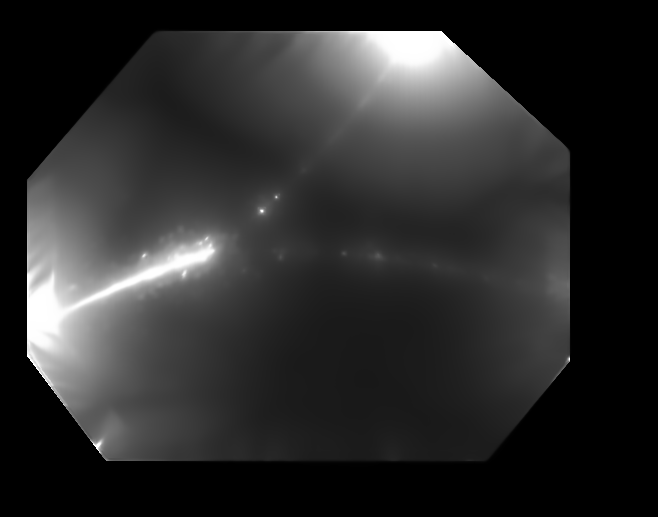

In [ ]:
noiseless_image_bw = cv2.fastNlMeansDenoising(image, None, 15, 7, 21)
cv2_imshow(noiseless_image_bw)

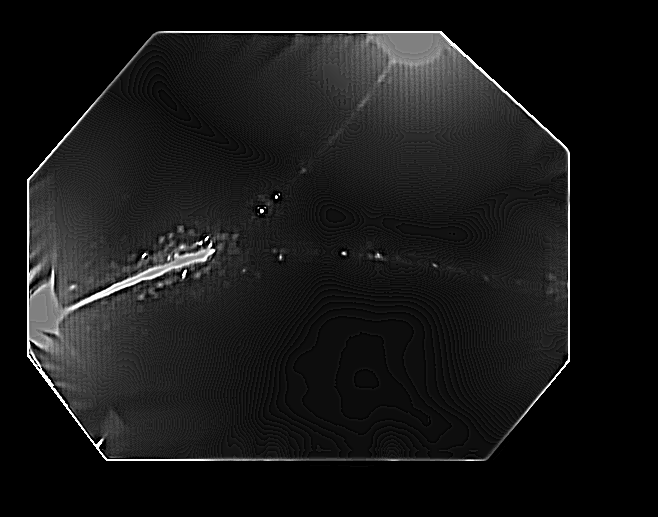

In [ ]:
# Create the sharpening kernel
a = -0.5
kernel = np.array([[-1,-1,-1, -1, -1], [-1,a,a,a, -1], [-1,a,20.5,a, -1], [-1,a,a, a, -1], [-1,-1,-1, -1, -1]])
# Apply the sharpening kernel to the image using filter2D
sharpened = cv2.filter2D(noiseless_image_bw, -1, kernel)
cv2_imshow(sharpened)

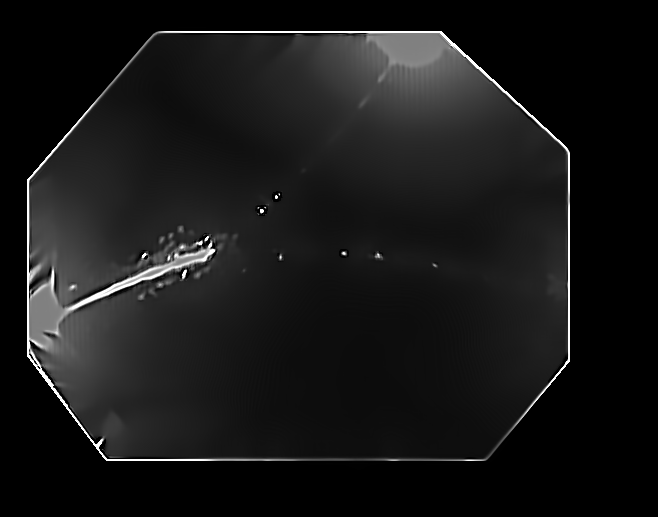

In [ ]:
noiseless_image_bw = cv2.fastNlMeansDenoising(sharpened, None, 15, 7, 21)
cv2_imshow(noiseless_image_bw)

### Trying some stuff

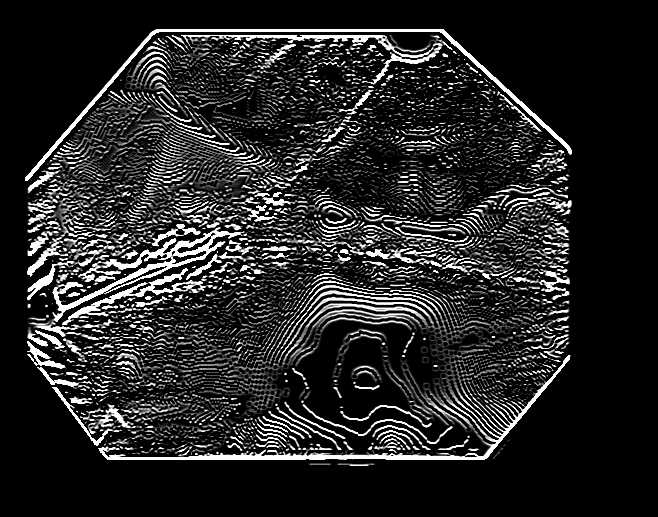

In [ ]:
sobel_noiseles = cv2.Sobel(sharpened,cv2.CV_64F,0,1,ksize=5)
cv2_imshow(sobel_noiseles)

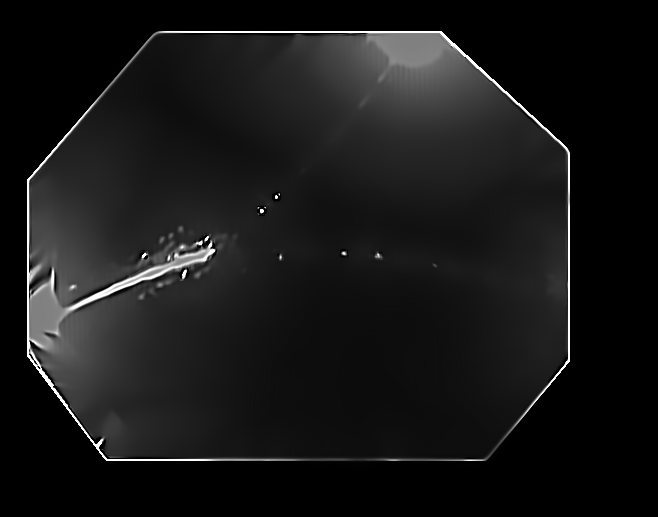

In [ ]:
noiseless_image_bw = cv2.fastNlMeansDenoising(sharpened, None, 20, 7, 21)
cv2_imshow(noiseless_image_bw)

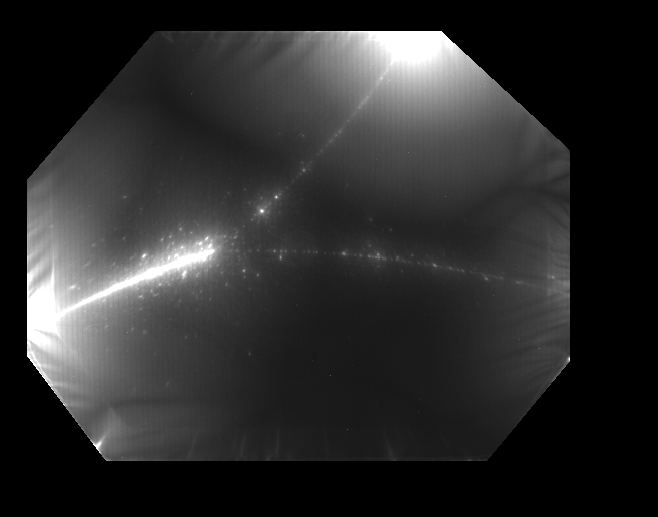

In [ ]:
cv2_imshow(image)